In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['Species'] = encoder.fit_transform(df['Species'])

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [11]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

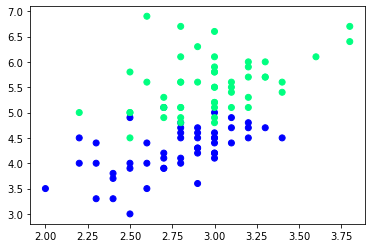

In [14]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [15]:
# Taking only 10 rows for training
df = df.sample(100) #shuffle
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [17]:
df_train

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
123,2.7,4.9,2
132,2.8,5.6,2
131,3.8,6.4,2
75,3.0,4.4,1
66,3.0,4.5,1
101,2.7,5.1,2
128,2.8,5.6,2
64,2.9,3.6,1
81,2.4,3.7,1


In [18]:
df_val

,SepalWidthCm,PetalLengthCm,Species
142,2.7,5.1,2
147,3.0,5.2,2
114,2.8,5.1,2
143,3.2,5.9,2
120,3.2,5.7,2


In [19]:
df_test

,SepalWidthCm,PetalLengthCm,Species
125,3.2,6.0,2
97,2.9,4.3,1
138,3.0,4.8,2
124,3.3,5.7,2
61,3.0,4.2,1


In [20]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [23]:
#X_test

In [24]:
#y_test

In [25]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [26]:
y_test

array([2, 2, 2, 2, 2])

**Case 1 - Bagging

In [53]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
101,2.7,5.1,2
64,2.9,3.6,1
101,2.7,5.1,2
135,3.0,6.1,2
81,2.4,3.7,1
81,2.4,3.7,1
131,3.8,6.4,2
75,3.0,4.4,1


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [55]:
dt_bag1 = DecisionTreeClassifier()

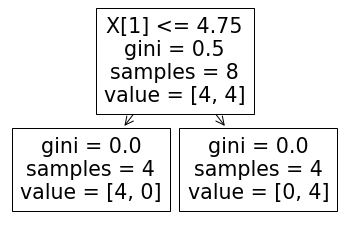

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1.0


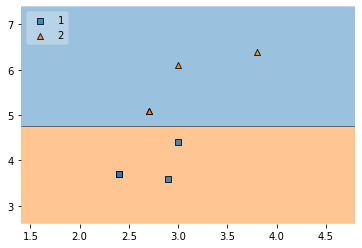

In [56]:
evaluate(dt_bag1,X,y)

In [57]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
75,3.0,4.4,1
135,3.0,6.1,2
81,2.4,3.7,1
128,2.8,5.6,2
66,3.0,4.5,1
66,3.0,4.5,1
81,2.4,3.7,1
81,2.4,3.7,1


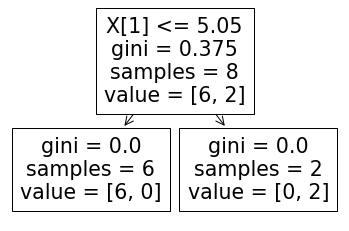

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1.0


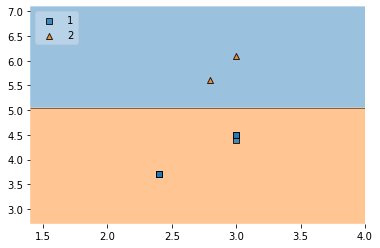

In [58]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [59]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
131,3.8,6.4,2
64,2.9,3.6,1
66,3.0,4.5,1
75,3.0,4.4,1
131,3.8,6.4,2
101,2.7,5.1,2
132,2.8,5.6,2


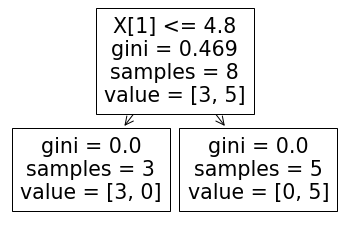

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1.0


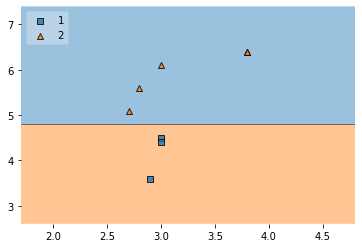

In [60]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [61]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

Predict

In [62]:
df_test

,SepalWidthCm,PetalLengthCm,Species
125,3.2,6.0,2
97,2.9,4.3,1
138,3.0,4.8,2
124,3.3,5.7,2
61,3.0,4.2,1


In [63]:
print("Predictor 1",dt_bag1.predict(np.array([3.0,4.8]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.0,4.2]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.3,5.7]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [2]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


Pasting

In [42]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
123,2.7,4.9,2
132,2.8,5.6,2
131,3.8,6.4,2
75,3.0,4.4,1
66,3.0,4.5,1
101,2.7,5.1,2
128,2.8,5.6,2
64,2.9,3.6,1
81,2.4,3.7,1


In [43]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
81,2.4,3.7,1
75,3.0,4.4,1
64,2.9,3.6,1
132,2.8,5.6,2
66,3.0,4.5,1
135,3.0,6.1,2
131,3.8,6.4,2
128,2.8,5.6,2


Random Subspaces

In [44]:
df1 = pd.read_csv('/kaggle/input/iris/Iris.csv')
df1 = df1.sample(10)

In [45]:

df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
28,29,5.2,3.4,1.4,0.2,Iris-setosa
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
2,3,4.7,3.2,1.3,0.2,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
129,130,7.2,3.0,5.8,1.6,Iris-virginica
15,16,5.7,4.4,1.5,0.4,Iris-setosa


In [46]:
df1.sample(2,replace=True,axis=1)

,PetalWidthCm,PetalWidthCm
58,1.3,1.3
28,0.2,0.2
95,1.2,1.2
2,0.2,0.2
147,2.0,2.0
99,1.3,1.3
56,1.6,1.6
1,0.2,0.2
129,1.6,1.6
15,0.4,0.4


Random Patches

In [47]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
28,29,5.2,3.4,1.4,0.2,Iris-setosa
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
2,3,4.7,3.2,1.3,0.2,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
129,130,7.2,3.0,5.8,1.6,Iris-virginica
15,16,5.7,4.4,1.5,0.4,Iris-setosa


In [48]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Id,PetalWidthCm
99,100,1.3
2,3,0.2
2,3,0.2
58,59,1.3
99,100,1.3
58,59,1.3
2,3,0.2
129,130,1.6


Finish